In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")


In [14]:
import os

# Change the working directory to C:\jupyter
os.chdir('C:\\jupyter')

# Verify the current working directory
print(os.getcwd())


C:\jupyter


In [15]:
# Load the datasets
train_path = r"C:\\jupyter\train.csv"  # Update this path to where you saved the train CSV file
test_path = r"C:\\jupyter\test.csv"  # Update this path to where you saved the test CSV file
submission_path =r"C:\\jupyter\gender_submission.csv"  # Update this path to where you saved the submission CSV file

train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)
submission_df = pd.read_csv(submission_path)

# Display the first few rows of the train dataset
train_df.head()

# Display the first few rows of the test dataset
test_df.head()

# Display the first few rows of the submission dataset
submission_df.head()


,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [16]:
# Check for missing values in train dataset
train_df.isnull().sum()

# Fill missing values for 'Age' with the median age in both train and test datasets
train_df['Age'].fillna(train_df['Age'].median(), inplace=True)
test_df['Age'].fillna(test_df['Age'].median(), inplace=True)

# Fill missing values for 'Embarked' with the mode in the train dataset
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)

# Fill missing values for 'Fare' with the median fare in the test dataset
test_df['Fare'].fillna(test_df['Fare'].median(), inplace=True)

# Drop the 'Cabin' column as it has too many missing values in both train and test datasets
train_df.drop(columns=['Cabin'], inplace=True)
test_df.drop(columns=['Cabin'], inplace=True)

# Display the updated missing values count for train dataset
train_df.isnull().sum()

# Display the updated missing values count for test dataset
test_df.isnull().sum()

# Convert 'Sex' and 'Embarked' to categorical types in both train and test datasets
train_df['Sex'] = train_df['Sex'].astype('category')
train_df['Embarked'] = train_df['Embarked'].astype('category')
test_df['Sex'] = test_df['Sex'].astype('category')
test_df['Embarked'] = test_df['Embarked'].astype('category')

# Display the data types for train dataset
train_df.dtypes

# Display the data types for test dataset
test_df.dtypes


C:\Users\bhanu\AppData\Local\Temp\ipykernel_12820\3692331530.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Age'].fillna(train_df['Age'].median(), inplace=True)
C:\Users\bhanu\AppData\Local\Temp\ipykernel_12820\3692331530.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a 

PassengerId       int64
Pclass            int64
Name             object
Sex            category
Age             float64
SibSp             int64
Parch             int64
Ticket           object
Fare            float64
Embarked       category
dtype: object

In [17]:
# Summary statistics for numerical columns in train dataset
train_df.describe()

# Summary statistics for categorical columns in train dataset
train_df.describe(include=['category'])


,Sex,Embarked
count,891,891
unique,2,3
top,male,S
freq,577,646


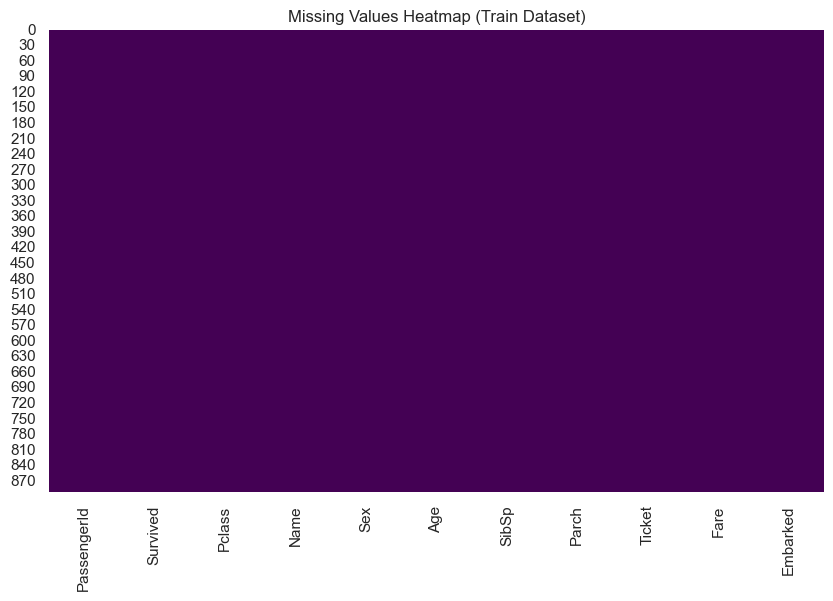

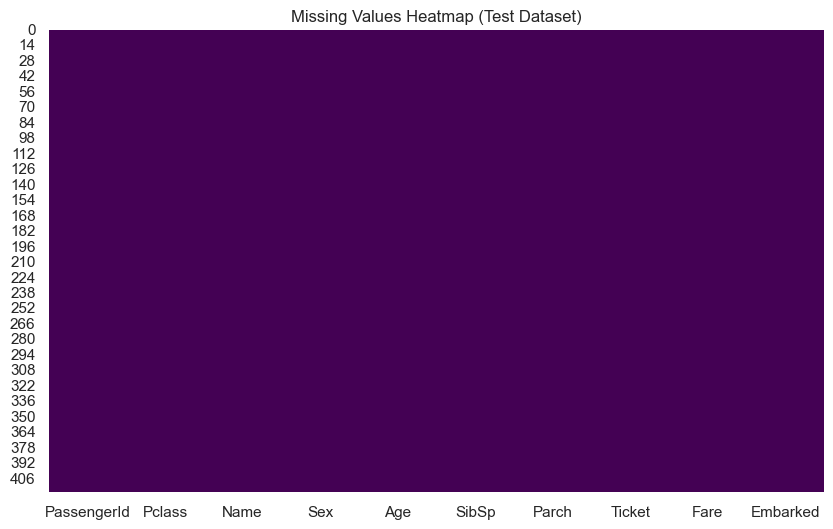

In [6]:
# Visualize missing values in train dataset
plt.figure(figsize=(10, 6))
sns.heatmap(train_df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap (Train Dataset)')
plt.show()

# Visualize missing values in test dataset
plt.figure(figsize=(10, 6))
sns.heatmap(test_df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap (Test Dataset)')
plt.show()


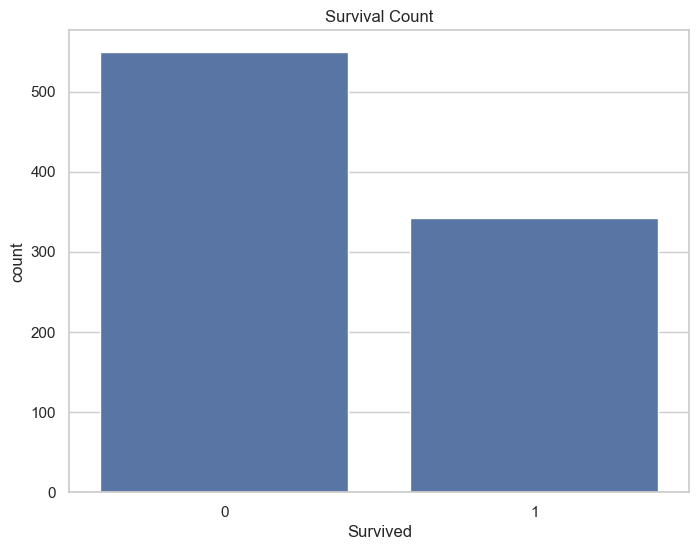

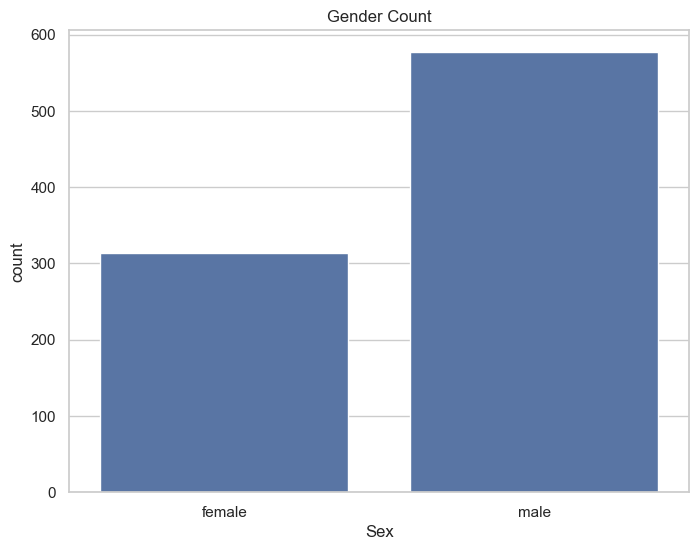

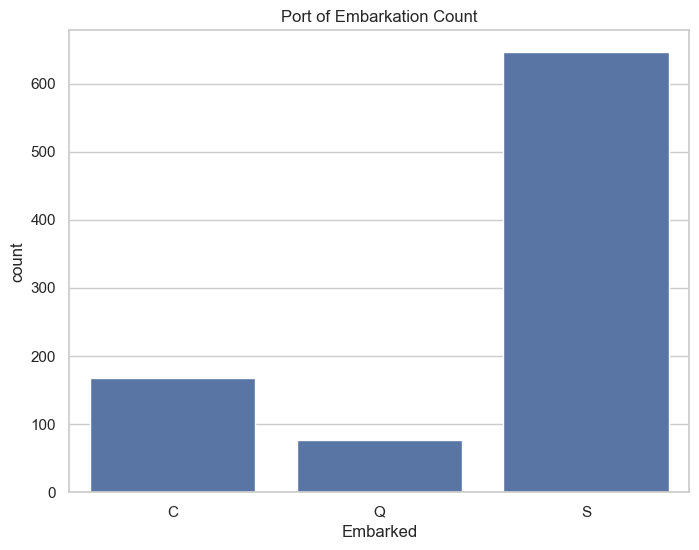

In [18]:
# Count plot for 'Survived' in train dataset
plt.figure(figsize=(8, 6))
sns.countplot(data=train_df, x='Survived')
plt.title('Survival Count')
plt.show()

# Count plot for 'Sex' in train dataset
plt.figure(figsize=(8, 6))
sns.countplot(data=train_df, x='Sex')
plt.title('Gender Count')
plt.show()

# Count plot for 'Embarked' in train dataset
plt.figure(figsize=(8, 6))
sns.countplot(data=train_df, x='Embarked')
plt.title('Port of Embarkation Count')
plt.show()


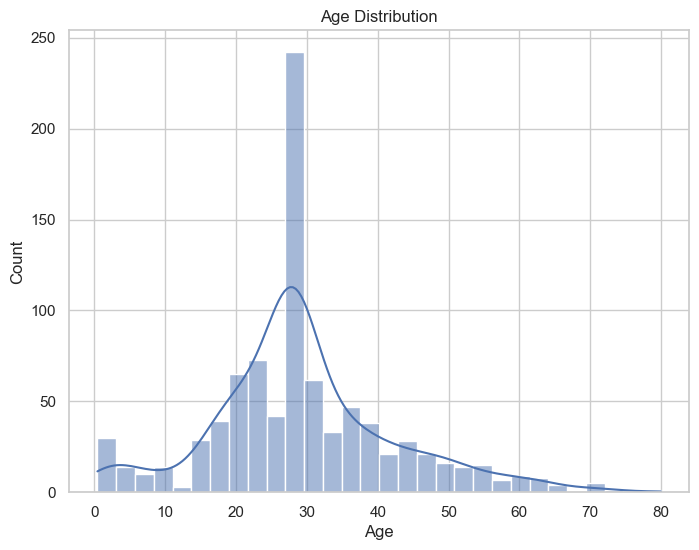

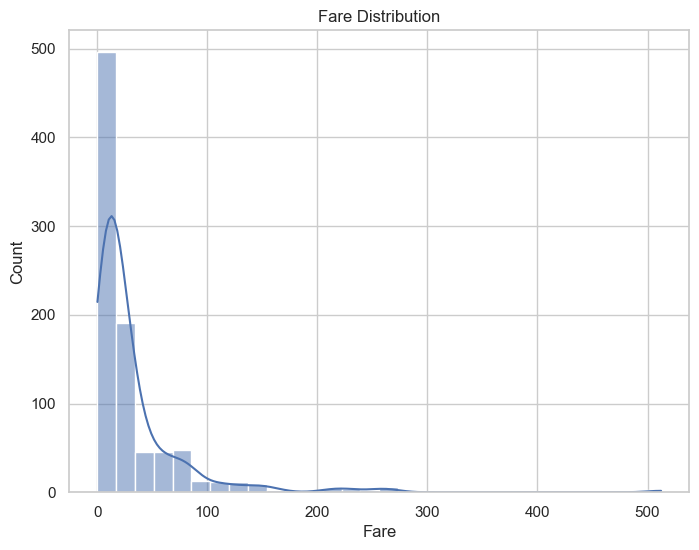

In [19]:
# Histogram for 'Age' in train dataset
plt.figure(figsize=(8, 6))
sns.histplot(data=train_df, x='Age', bins=30, kde=True)
plt.title('Age Distribution')
plt.show()

# Histogram for 'Fare' in train dataset
plt.figure(figsize=(8, 6))
sns.histplot(data=train_df, x='Fare', bins=30, kde=True)
plt.title('Fare Distribution')
plt.show()


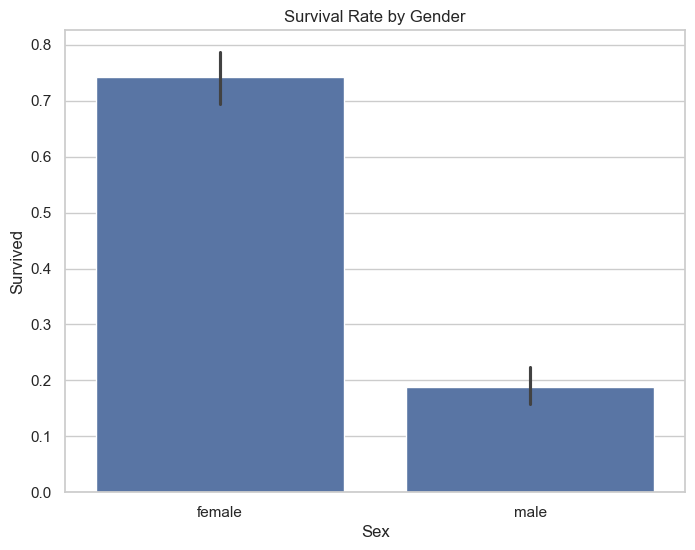

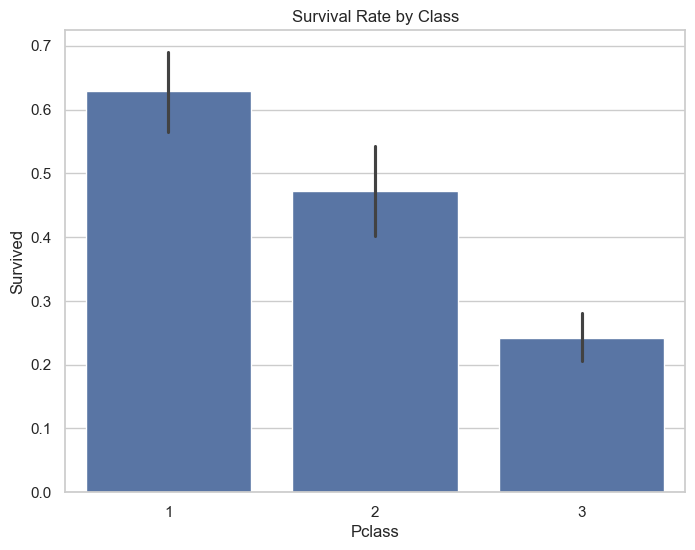

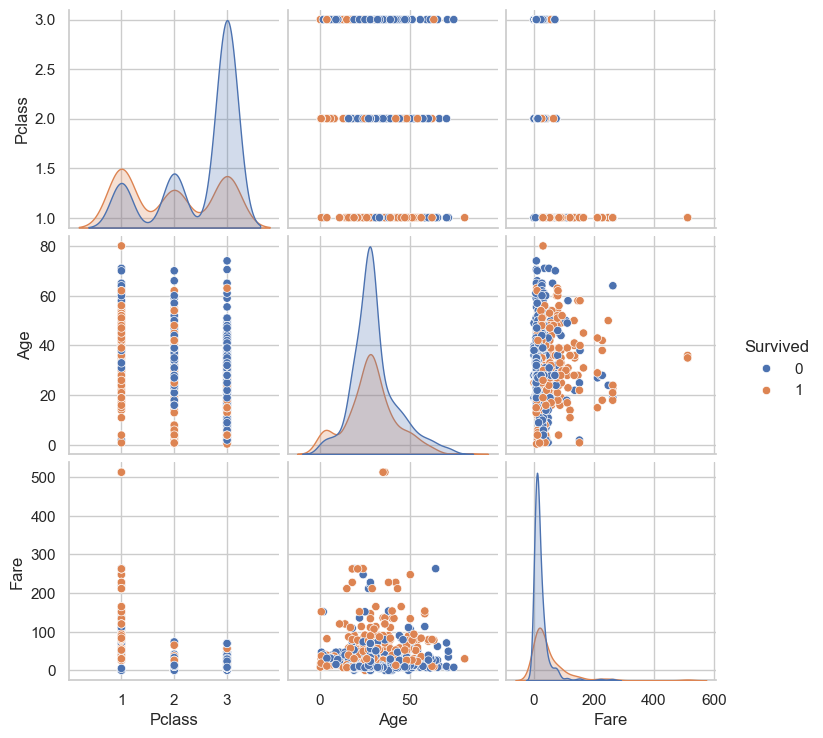

In [20]:
# Survival rate by gender in train dataset
plt.figure(figsize=(8, 6))
sns.barplot(data=train_df, x='Sex', y='Survived')
plt.title('Survival Rate by Gender')
plt.show()

# Survival rate by class in train dataset
plt.figure(figsize=(8, 6))
sns.barplot(data=train_df, x='Pclass', y='Survived')
plt.title('Survival Rate by Class')
plt.show()

# Pairplot for numerical features in train dataset
sns.pairplot(train_df[['Survived', 'Pclass', 'Age', 'Fare']], hue='Survived')
plt.show()


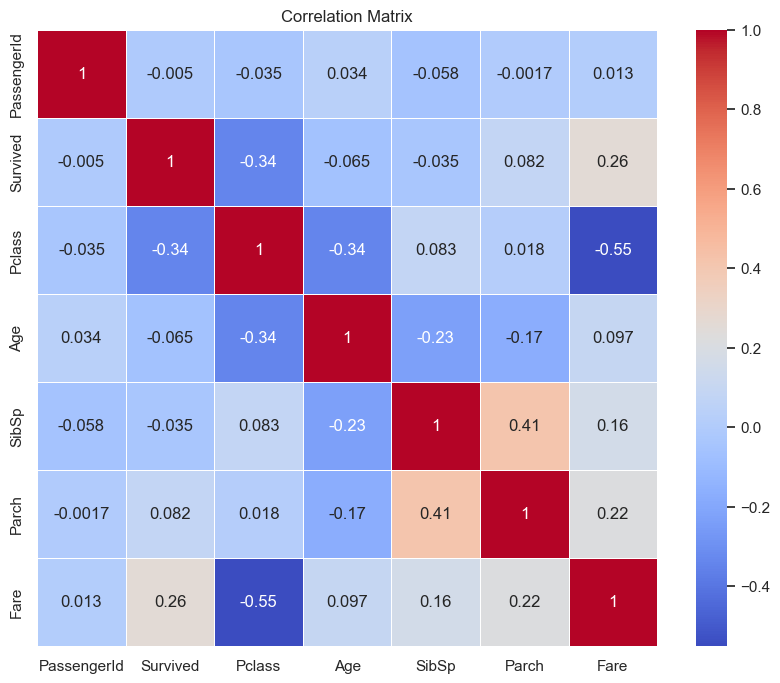

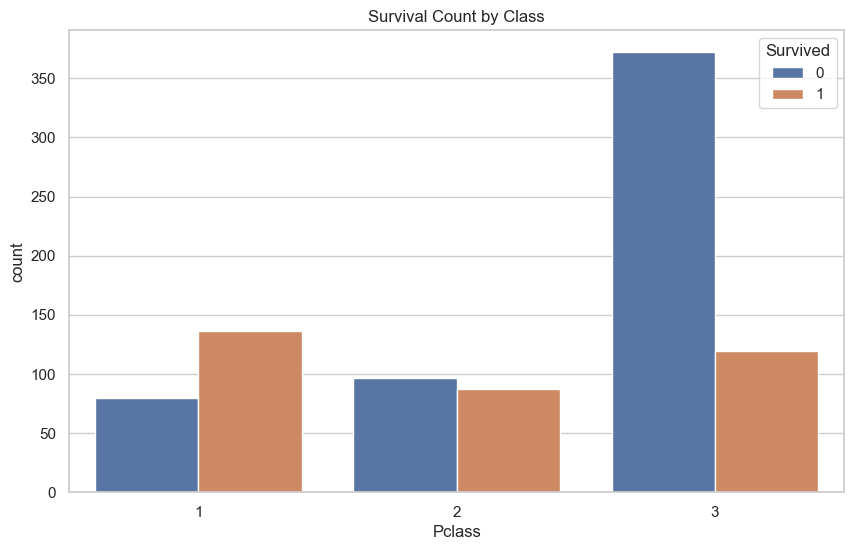

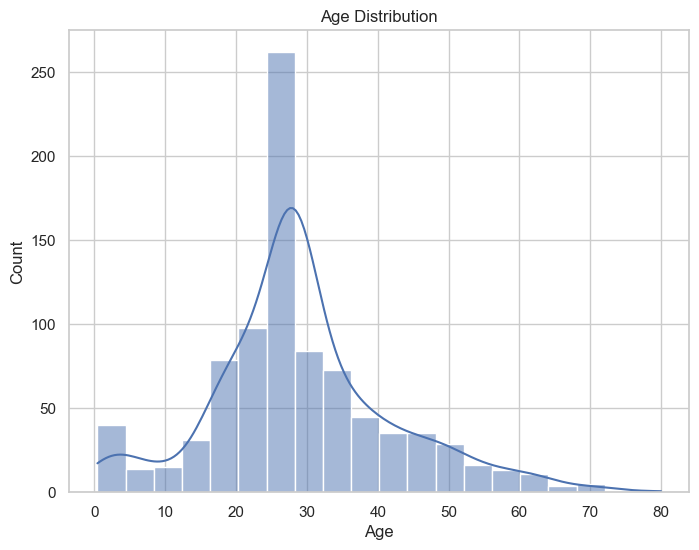

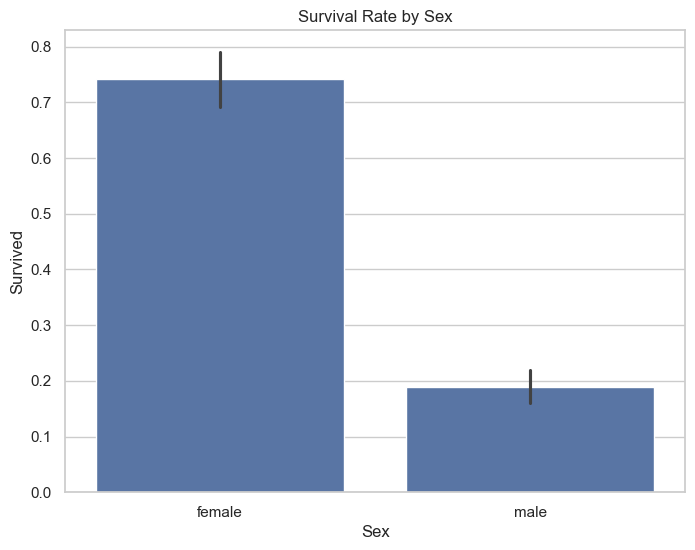

In [21]:
plt.figure(figsize=(10, 8))
numeric_columns = train_df.select_dtypes(include=[np.number]).columns.tolist()
sns.heatmap(train_df[numeric_columns].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Count plot for categorical variables
plt.figure(figsize=(10, 6))
sns.countplot(data=train_df, x='Pclass', hue='Survived')
plt.title('Survival Count by Class')
plt.show()

# Additional Visualizations

# Histogram of Age distribution
plt.figure(figsize=(8, 6))
sns.histplot(train_df['Age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# Bar plot of Survival by Sex
plt.figure(figsize=(8, 6))
sns.barplot(data=train_df, x='Sex', y='Survived')
plt.title('Survival Rate by Sex')
plt.show()